In [57]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

In [2]:
xy = np.array([
    [1,3,2,8,6,7,-3,-2,-7],
    [2,3,2,8,6,7,-3,-4,-7]
], dtype=float).T

In [3]:
n_size = len(xy)
m_size = None
m = None
u = None
w = None
cov = None

def initiate(u_init):
    global u, cov, m, m_size, n_size, w
    m_size = len(u_init)
    m = np.ones(m_size) * (1.0 / m_size)
    u = u_init
    cov = np.stack([np.identity(2)] * m_size)
    w = None

In [4]:
def p(x, u, cov):
    cov_inv = numpy.linalg.inv(cov)
    det = numpy.linalg.det(cov)
    x_u = (x - u)[np.newaxis, :].T
    result = np.exp(-1/2 * np.matmul(np.matmul(x_u.T, cov_inv), x_u)) / np.sqrt(2 * np.pi * det)
    result = result.reshape(1)
    return result

In [5]:
def expectation(xy):
    global w, m, m_size, n_size, u
    w = np.zeros((n_size, m_size))
    for n in range(n_size):
        div = 0.0
        for j in range(m_size):
            div += p(xy[n], u[j], cov[j]) * m[j]
        for j in range(m_size):
            w[n][j] = p(xy[n], u[j], cov[j]) * m[j] / div

In [6]:
def maximization(xy):
    global w, m, m_size, n_size, u, cov
    for j in range(m_size):
        sum_w = np.sum(w.T[j])
        
        x_u = xy - u[j]
        sum_cov = np.dot(np.multiply(w[:, j], x_u.T), x_u)
        sum_cov[0][1] = sum_cov[1][0] = 0
        cov[j] = sum_cov / sum_w
        
        m[j] = sum_w / n_size
        u[j] = np.sum(w.T[j] * xy.T, axis=1) / sum_w

In [60]:
def likelihood():
    global w, m, m_size, n_size, u, cov
    prob = 0.0
    for n in range(n_size):
        pp = 0
        for j in range(m_size):
            pp += p(xy[n], u[j], cov[j]) * m[j]
        prob += np.log(pp)
    return prob

In [8]:
def show():
    print("w:\n", w)
    print("m:\n", m)
    print("u:\n", u)
    print("cov:\n", cov)
    print("")

In [9]:
initiate(np.array([[3,3], [2,2], [-3,-3]], dtype=float))
show()
for i in range(3):
    print("Iteration " + str(i + 1))
    expectation(xy)
    maximization(xy)
    show()

w:
 None
m:
 [ 0.33333333  0.33333333  0.33333333]
u:
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
cov:
 [[[ 1.  0.]
  [ 0.  1.]]

 [[ 1.  0.]
  [ 0.  1.]]

 [[ 1.  0.]
  [ 0.  1.]]]

Iteration 1
w:
 [[  1.19202922e-01   8.80797076e-01   1.81545808e-09]
 [  7.31058579e-01   2.68941421e-01   1.69570706e-16]
 [  2.68941421e-01   7.31058579e-01   1.01529005e-11]
 [  9.99983299e-01   1.67014218e-05   2.03105874e-42]
 [  9.99088949e-01   9.11051194e-04   5.37528453e-32]
 [  9.99876605e-01   1.23394576e-04   3.30529272e-37]
 [  2.31952283e-16   1.38879439e-11   1.00000000e+00]
 [  2.31952283e-16   1.38879439e-11   1.00000000e+00]
 [  3.30570063e-37   5.90009054e-29   1.00000000e+00]]
m:
 [ 0.45757242  0.20909425  0.33333333]
u:
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
cov:
 [[[ 12.31988634   0.        ]
  [  0.          12.23304914]]

 [[  0.62066718   0.        ]
  [  0.           0.15261824]]

 [[  5.66666667   0.        ]
  [  0.           5.66666668]]]

It

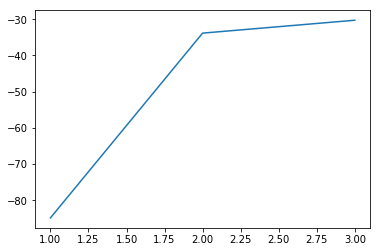

In [71]:
likelihood_hist = []

initiate(np.array([[3,3], [2,2], [-3,-3]], dtype=float))
for i in range(3):
    likelihood_hist.append(likelihood())
    expectation(xy)
    maximization(xy)
    
plt.plot(np.arange(1,4), likelihood_hist)
plt.show()

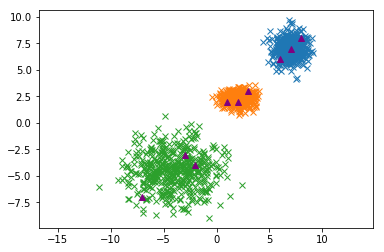

In [29]:
for i in range(len(u)):
    x, y = np.random.multivariate_normal(u[i], cov[i], 500).T
    plt.plot(x, y, 'x')
    plt.axis('equal')
plt.plot(xy.T[0], xy.T[1], '^', color='purple')
plt.show()

In [31]:
initiate(np.array([[3,3], [-3,-3]], dtype=float))
show()
for i in range(3):
    print("Iteration " + str(i + 1))
    expectation(xy)
    maximization(xy)
    show()

w:
 None
m:
 [ 0.5  0.5]
u:
 [[ 3.  3.]
 [-3. -3.]]
cov:
 [[[ 1.  0.]
  [ 0.  1.]]

 [[ 1.  0.]
  [ 0.  1.]]]

Iteration 1
w:
 [[  9.99999985e-01   1.52299795e-08]
 [  1.00000000e+00   2.31952283e-16]
 [  1.00000000e+00   3.77513454e-11]
 [  1.00000000e+00   2.03109266e-42]
 [  1.00000000e+00   5.38018616e-32]
 [  1.00000000e+00   3.30570063e-37]
 [  2.31952283e-16   1.00000000e+00]
 [  2.31952283e-16   1.00000000e+00]
 [  3.30570063e-37   1.00000000e+00]]
m:
 [ 0.66666666  0.33333334]
u:
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
cov:
 [[[ 9.16666668  0.        ]
  [ 0.          8.66666669]]

 [[ 5.66666672  0.        ]
  [ 0.          5.66666677]]]

Iteration 2
w:
 [[  9.94979696e-01   5.02030393e-03]
 [  9.99922646e-01   7.73541258e-05]
 [  9.98623856e-01   1.37614400e-03]
 [  1.00000000e+00   6.27933891e-12]
 [  9.99999994e-01   6.33185482e-09]
 [  1.00000000e+00   2.12626993e-10]
 [  2.77132409e-03   9.97228676e-01]
 [  2.45908782e-03   9.97540912e-01]
 [  1.30217751e

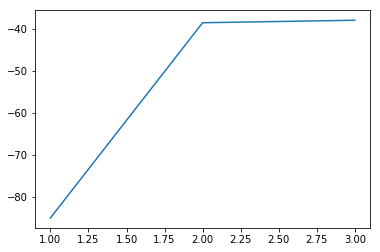

In [69]:
likelihood_hist = []

initiate(np.array([[3,3], [-3,-3]], dtype=float))
for i in range(3):
    likelihood_hist.append(likelihood())
    expectation(xy)
    maximization(xy)
    
plt.plot(np.arange(1,4), likelihood_hist)
plt.show()

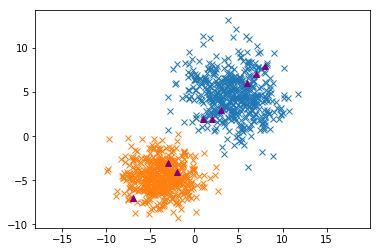

In [33]:
for i in range(len(u)):
    x, y = np.random.multivariate_normal(u[i], cov[i], 500).T
    plt.plot(x, y, 'x')
    plt.axis('equal')
plt.plot(xy.T[0], xy.T[1], '^', color='purple')
plt.show()